In [1]:
%run header.ipynb

Infinite Impulse Response (IIR) filters are such filters which include recursion, respectively feedback, in their implementation. Their impulse response does thus not drop to zero after a given time. They can become instable due to the feedback.
However, IIR filters require less coefficients and thus less operations to get a filter with the desired effect than FIR filters.
As FIR filters, IIR filters create an output sequence $y[n]$ from an input sequence $x[n]$:


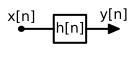

In [2]:
d = schem.Drawing(unit=1, fontsize=14)

d.add(e.DOT, label='$x[n]$');
d.add(e.LINE, d='r')
d.add(dsp.BOX, label='$h[n]$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD,label='$y[n]$')


d.draw();

## The Difference Equation

For the difference equation the recursion is included with additional coefficients $a_n$, feeding back the output signal $y[n]$ with different delays. The following difference function represents a second order IIR filter. Also referred to as *biquad filter*, this is a basic component for many digital filter implementations:

$$
y[n] = b_0 x[n] + b_1 x[n-1]+ b_2 x[n-2] - a_1 y[n-1] - a_2 y[n-2]
$$

Or short:

$$
   y[n] =  \sum\limits_{i=0}^{i=N} b_i  x[n-i] - \sum\limits_{i=1}^{i=N} a_i  y[n-i]
$$

## Implementation Structure 

The above difference equation can be transferred into different implementation structures. These structures can be directly implemented in actual code. The following one is the *direct form 1*:

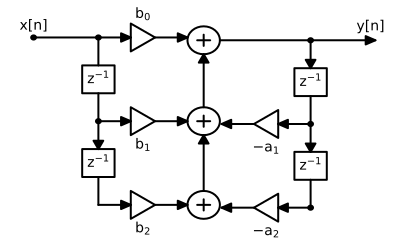

In [3]:

d = schem.Drawing(unit=1, fontsize=14)

d.add(e.DOT, label='$x[n]$');
d.add(e.LINE, d='r',l=2)
d.add(e.DOT);
 
d.push()

d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)
d.add(dsp.AMP,toplabel='$b_0$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)

d.pop()

d.add(e.LINE, d='d',l=1)
z1 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='d',l=1)

d.push();

d1 = d.add(e.DOT);


d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)
d.add(dsp.AMP,botlabel='$b_1$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)

d.pop();

d.add(e.LINE, d='d',l=1)
d.add(e.ARROWHEAD)
z1 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='d',l=1)



d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)
d.add(dsp.AMP,botlabel='$b_2$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)
s1 = d.add(dsp.SUM)


d.add(e.LINE, d='u',xy=s1.N,l=2)
d.add(e.ARROWHEAD)
s0 = d.add(dsp.SUM)




d.add(e.LINE, d='u',l=1.9)
d.add(e.ARROWHEAD)



xx = d.add(dsp.SUM)
d.add(e.LINE, d='r',l=2.8, xy=xx.S)
dd = d.add(e.DOT);


d.push()




d.add(e.LINE, d='d',l=1)
d.add(e.ARROWHEAD)
z1 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='d',l=1)
d1 = d.add(e.DOT);

d.push();

d.add(e.LINE, d='l')
d.add(e.ARROWHEAD)
d.add(dsp.AMP,botlabel='$-a_1$')
d.add(e.LINE, d='l')
d.add(e.ARROWHEAD)

d.pop()


d.add(e.LINE, d='d',l=1)
d.add(e.ARROWHEAD)
z1 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='d',l=1)
d1 = d.add(e.DOT);

d.push();

d.add(e.LINE, d='l')
d.add(e.ARROWHEAD)
d.add(dsp.AMP,botlabel='$-a_2$')
d.add(e.LINE, d='l')
d.add(e.ARROWHEAD)

d.pop()

 

d.add(e.LINE, d='r',xy=dd.end,l=2)
d.add(e.ARROWHEAD,label='$y[n]$')


d.draw();

## Polynominals


A filter of the order $N$ can be expressed as a polynominal, 
using the Z-operator $z = e^{sT}$:

$$
h[n]  = \frac{\sum\limits_{n=0}^{n=N} b_n  z^{-n}}{\sum\limits_{n=1}^{n=N} a_n  z^{-n}}
$$





## Pole-Zero Plot

IIR filters have roots in the demoninator, called zeros and in the nominator, called poles:

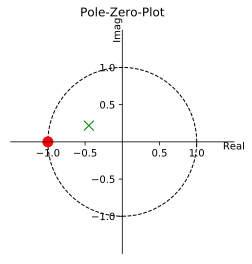

In [4]:
%run header.ipynb
ax = plt.subplot(111)
ax.axis('equal')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)
    
uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
ax.add_patch(uc)


b, a, k = signal.butter(2, 0.1, output='zpk')
 
a[0] *= 2   
    
# zeros
z  = np.roots(b)
t1 = plt.plot(z.real, z.imag, 'ro', ms=10);

# poles
p  = np.roots(a)
t2 = plt.plot(p.real, p.imag, 'gx', ms=10)

plt.suptitle('Pole-Zero-Plot')
plt.xlabel('Real')
plt.ylabel('Imag')
ax.xaxis.set_label_coords(1,   0.5)
ax.yaxis.set_label_coords(0.5, 1)
 
